 **(Exploratory Data Analysis)**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

>The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:

# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import kurtosis




In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = /content/Financial Dataset - 1.csv
# ---
# 

sns.set_style()
financial = pd.read_csv("/content/Financial Dataset - 1.csv")
names = ['country','year','uniqueid','Has a Bank account','Type of Location','Cell Phone Access',	'household_size',	'Respondent Age','gender_of_respondent','The relathip with head',	'marital_status','Level of Educuation','Type of Job']
financial



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
# Determining the no. of records in our dataset
#
financial.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#Checking for values in columns
financial["The relathip with head"].values


array(['Spouse', 'Head of Household', 'Other relative', ..., 'Parent',
       'Parent', 'Child'], dtype=object)

In [ ]:
financial['marital_status'].values

array(['Married/Living together', 'Widowed', 'Single/Never Married', ...,
       'Widowed', 'Divorced/Seperated', 'Single/Never Married'],
      dtype=object)

In [ ]:
financial['Level of Educuation'].values

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', ..., 'Primary education',
       'Secondary education', 'Secondary education'], dtype=object)

In [ ]:
financial['Type of Job'].values

array(['Self employed', 'Government Dependent', 'Self employed', ...,
       'Other Income', 'Self employed', 'No Income'], dtype=object)

In [ ]:
financial.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1688,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
print(financial.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


## 4. External Data Source Validation

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018.  [link ](https://fsdkenya.org/publication/finaccess2019/) 
Finscope Rwanda 2016. [link ](http://www.statistics.gov.rw/publication/finscope-rwanda-2016) 
Finscope Tanzania 2017.[link ](http://www.fsdt.or.tz/finscope/) 
Finscope Uganda 2018.  [link ](http://fsduganda.or.ug/finscope-2018-survey-report//) 

### a.Validation

## 5. Tidying the Dataset

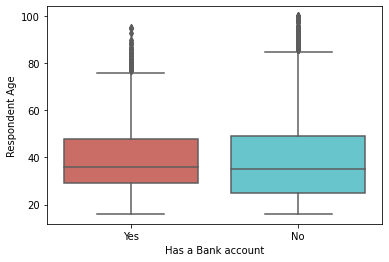

In [ ]:
# Checking for Outliers


sns.boxplot(x='Has a Bank account',y='Respondent Age',data=financial,palette='hls')

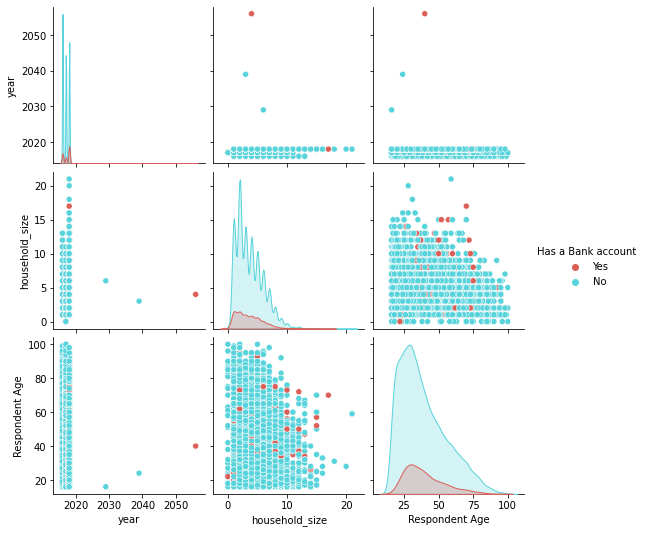

In [ ]:
# Checking for Anomalies
#

sns.pairplot(financial,hue="Has a Bank account",palette="hls")

In [ ]:
# Identifying the Missing Data
#
financial.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dealing with the Missing Data


#Dropping columns

financial.drop('uniqueid',
  axis='columns', inplace=True),
financial.drop('country',
  axis='columns', inplace=True)
financial.drop('household_size',
  axis='columns', inplace=True)
financial.drop('The relathip with head',
  axis='columns', inplace=True)
financial.drop('marital_status',
  axis='columns', inplace=True)

In [ ]:
#Checking for null values in objects
financial= financial.select_dtypes(include=['object']).copy()
financial.head()

,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,Level of Educuation,Type of Job
0,Yes,Rural,Yes,Female,Secondary education,Self employed
1,No,Rural,No,Female,No formal education,Government Dependent
2,Yes,Urban,Yes,Male,Vocational/Specialised training,Self employed
3,No,Rural,Yes,Female,Primary education,Formally employed Private
4,No,Urban,No,Male,Primary education,Informally employed


In [ ]:
financial.dtypes

Has a Bank account      object
Type of Location        object
Cell Phone Access       object
gender_of_respondent    object
Level of Educuation     object
Type of Job             object
dtype: object

In [ ]:
# More data cleaning procedures


#Filling Null Values and confirming if theyre filled
financial = financial.fillna(financial.index[0])
financial.isna().sum()

Has a Bank account      0
Type of Location        0
Cell Phone Access       0
gender_of_respondent    0
Level of Educuation     0
Type of Job             0
dtype: int64

In [ ]:
# Extracting the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = financial.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = financial.columns[categorical_feature_mask].tolist()
categorical_cols

['Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'Level of Educuation',
 'Type of Job']

In [ ]:
#view columns using df.columns

financial.columns


Index(['Has a Bank account', 'Type of Location', 'Cell Phone Access',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
financial['Has a Bank account'].value_counts()

No     20179
Yes     3309
0         36
Name: Has a Bank account, dtype: int64

## 6. Exploratory Analysis

**Univariate Analysis**

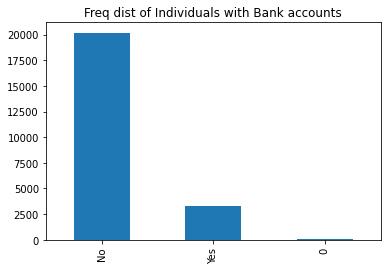

In [ ]:
# Ploting the univariate summary and recording our observations
#
financial['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Individuals with Bank accounts')

Here, we see that there are more individuals with bank accounts than those without

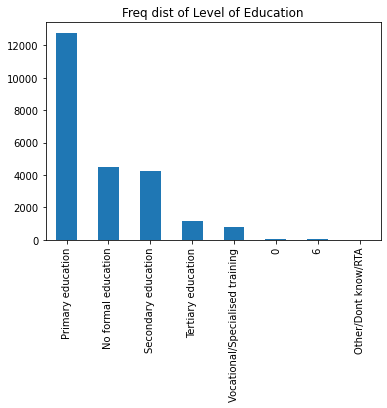

In [ ]:
financial['Level of Educuation'].value_counts().plot.bar(title='Freq dist of Level of Education')

From these we see most individuals have attended Primary education,followed by no formal education then secondary education ,tertiary education and Vocational training and Others.

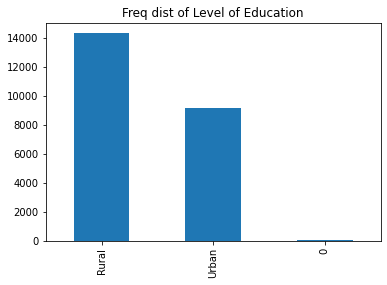

In [ ]:
financial['Type of Location'].value_counts().plot.bar(title='Freq dist of Level of Type of location')

There are few individuals from urban compared to those from Rural.
The bank should consider investing more on people in the rural areas and sanitize them into having a bank account since they are many compared to those in Urban areas



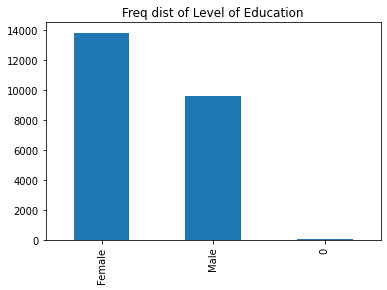

In [ ]:
financial['gender_of_respondent'].value_counts().plot.bar(title='Freq dist of Gender of Respondent')

**Hot encoding**

In [ ]:
# import OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

financial1=pd.get_dummies(financial, columns=["Has a Bank account","Type of Location","Cell Phone Access","gender_of_respondent","Level of Educuation","Type of Job"])
financial1.head()

**Bivariate Analysis**

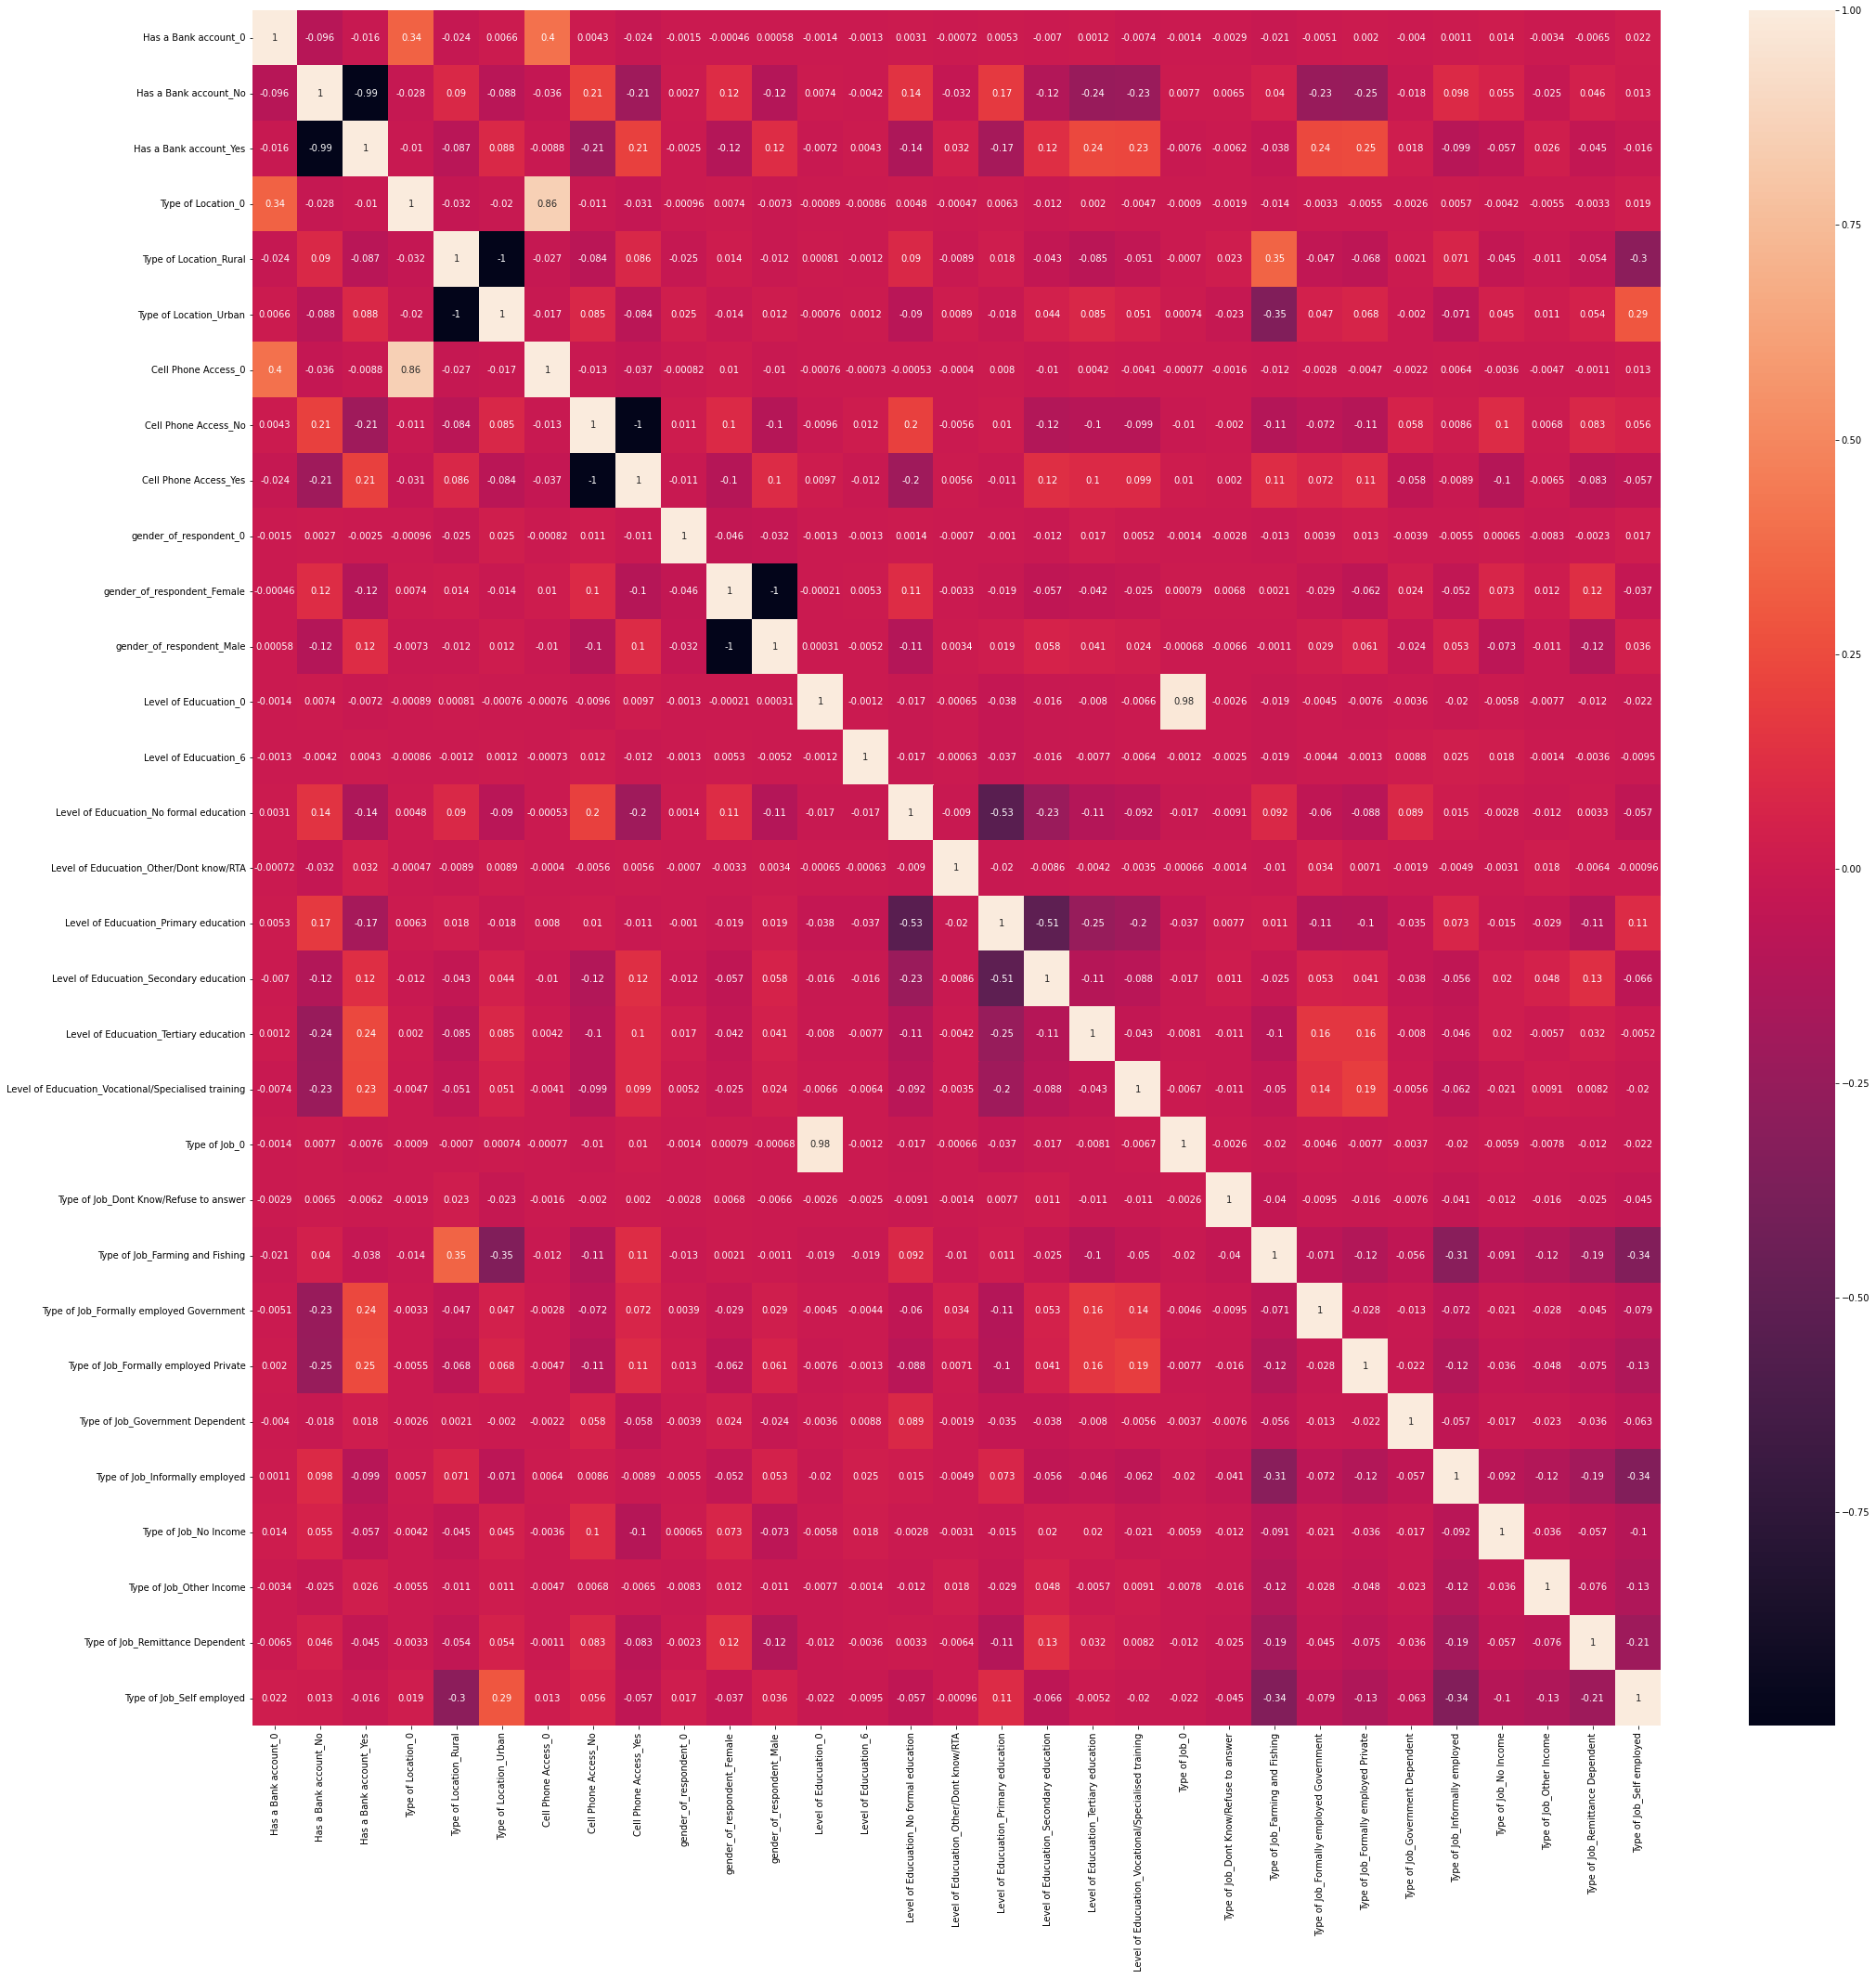

In [ ]:
#Correlation
plt.figure(figsize=(34,34))

financial1_corr = financial1.corr()
sns.heatmap(financial1_corr, 
            xticklabels = financial1_corr.columns.values,
            yticklabels = financial1_corr.columns.values,
            annot = True);
            



 Correlation coefficients between -.20 and .20 are generally considered weak, 
between .20 and .50 (positive or negative) are considered moderate, and above .50 (positive or negative) are considered strong. 
Since the correlation coefficent of accelaration and mpg is 0.42, this means that accelaration and mpg are moderately correlated.

In [ ]:

# Calculating the pearson coefficient
financial1["Has a Bank account_0"].corr(financial1["gender_of_respondent_Male"]) 
financial1["Has a Bank account_0"].corr(financial1["gender_of_respondent_Female"]) 

-0.0004623000673412243

Negative correlation or inverse correlation is a relationship between two variables where they move in different directions,so the gender is inversley propotinal to indivuals having a bank account.There is no correlation




In [ ]:
# Calculating the pearson coefficient
pearson_coeff = financial1["Has a Bank account_0"].corr(financial1["Type of Location_0"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial1["Has a Bank account_0"].corr(financial1["Type of Location_0"]) 
print(coeff)




0.3436498989001643
0.3436498989001643


A negative (inverse) correlation occurs when the correlation coefficient is less than 0 and indicates that both variables move in the opposite direction. 
In short, any reading between 0 and -1 means that the two securities move in opposite directions.
The correlation coefficient is calculated to be 0.34.This is a moderate positive correlation ,meaning The type of location is moderately correlated to the number of individuals having a bank account

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = financial1["Has a Bank account_0"].corr(financial1["Type of Job_0"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial1["Has a Bank account_0"].corr(financial1["Type of Job_0"]) 
print(coeff)

-0.0013989763619387042
-0.0013989763619387042


Negative correlation or inverse correlation is a relationship between two variables where they move in different directions,so the Type of Job is inversley propotinal to indivuals having a bank account

In [ ]:
# Step 2: Let's take a look at what our dataset looks like:
#
financial1.head()

In [ ]:
#Checking the shape of our dataset
financial1.shape

**Multivariate Principle Component Analysis**

In [ ]:
# Step 3: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = financial1.drop('Has a Bank account_0', 1)
y = financial1['Has a Bank account_0']



In [ ]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 5: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_


explained_variance

The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
The values for the explained_variance variable looks like what is shown in the output. 
It can be seen that first principal component is responsible for 10.20% variance. 
Similarly, the second principal component causes 8.5% variance in the dataset. 
Collectively we can say that (10.20 + 8.5) 18.25% percent of the classification information contained 
 in the feature set is captured by the first two principal components.

In [ ]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict the instances, 
# resulting in 99.8% accuracy.

[[4696    0]
 [   9    0]]
Accuracy 0.9980871413390011


In [ ]:
# Step 11: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2. 
# The classification results with 2 components are as shown in the output.


In [ ]:
# Step 12: Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4696    0]
 [   9    0]]
Accuracy 0.9980871413390011


In [ ]:
#Calculating Kurtosis
print(kurtosis(financial1, fisher=True))


[ 6.48445977e+02  2.19835234e+00  2.27278673e+00  1.56326730e+03
 -1.79847140e+00 -1.79599752e+00  2.13354592e+03 -7.73404268e-01
 -7.79579138e-01  6.86883800e+02 -1.86868235e+00 -1.86424386e+00
  8.06173648e+02  8.66260408e+02  4.57528194e-01  2.93550034e+03
 -1.97010835e+00  7.93015125e-01  1.54011619e+01  2.43304850e+01
  7.79134610e+02  1.81703798e+02 -3.69848740e-01  5.58022562e+01
  1.73445839e+01  9.02494777e+01 -4.78032300e-01  3.25457248e+01
  1.68296012e+01  4.44031726e+00 -9.64391427e-01]


In [ ]:
# Calculating the z - score from the given array
# ---
#
from scipy import stats

a =np.array([1.05504208e-01, 8.74897674e-02, 7.08828615e-02, 6.90586264e-02,
       6.35057901e-02, 5.99496400e-02, 5.03486946e-02, 4.55744740e-02,
       4.21940269e-02, 3.71438263e-02, 3.68774351e-02, 3.64149489e-02,
       3.54029343e-02, 3.48633291e-02, 3.46004785e-02, 3.41856999e-02,
       3.39571200e-02, 3.35139486e-02, 3.12940959e-02, 2.86426331e-02,
       2.26292070e-02, 5.80257453e-03, 1.63679713e-04, 6.59975364e-31,
       1.85167149e-31, 3.22875087e-32, 1.96013845e-32, 1.57270852e-32,
       5.58072862e-34])
stats.zscore(a)

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?